In [1]:
#numpy:-numerical data scientefic computing
#pandas for data manupulation(csv,tabuler form of data like sql,csv)
#matplotlib;-visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
data=pd.read_csv('/home/pardeep/Boston.csv')

In [3]:
data

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
#in shape data
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
#Have a glance at the dependent and independent variables
data_=data.loc[:,['lstat','medv']]
data_.head(5)

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


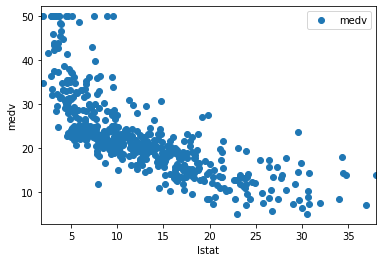

In [6]:
#Visualize the change in the variables
data.plot(x="lstat",y='medv',style='o')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()


In [7]:
#Divide the data into independent and dependent variables
x=pd.DataFrame(data['lstat'])
y=pd.DataFrame(data['medv'])

In [8]:
x.head()


,lstat
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


In [9]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [10]:
#Split the data into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
print(x_train.head())
print(x_test.head())
print(y_train.head())
print(y_test.head())

     lstat
34   20.34
459  14.70
207  18.06
338   8.51
448  18.13
     lstat
18   11.69
97    4.21
316  18.33
237   4.73
502   9.08
     medv
34   13.5
459  20.0
207  22.5
338  20.6
448  14.1
     medv
18   20.2
97   38.7
316  17.8
237  31.5
502  20.6


In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [13]:
#Train the algorithm
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [14]:
#Retrieve the intercept
regressor.intercept_

array([34.22699097])

In [15]:
regressor.coef_

array([[-0.92206543]])

In [16]:
y_pred[:7]

array([[23.44804608],
       [30.3450955 ],
       [17.32553162],
       [29.86562148],
       [25.85463686],
       [27.09020453],
       [23.03311664]])

In [17]:
y_test

,medv
18,20.2
97,38.7
316,17.8
237,31.5
502,20.6
...,...
43,24.7
241,20.1
361,19.9
495,23.1


In [21]:
#Evaluate the algorithm
from sklearn import metrics
print('Mean Squared Error',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Squared Error 39.18459458847928
Root Mean Squared Error 6.259759946553803
